In [14]:
import scanpy as sc
import numpy as np
import pandas as pd
import leidenalg
import umap

In [15]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.0.dev47+g9969734 anndata==0.9.0rc2.dev13+gc511df3 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
results_file = 'write/pbmc3k.h5ad'  

In [9]:
adata = sc.read_10x_mtx(
    '/Users/bharadwajanandivada/Downloads/Data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)

adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [10]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=3)

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, method='umap', metric='correlation')

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [16]:
sc.tl.paga(adata)
sc.tl.umap(adata)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/bharadwajanandivada/.pyenv/versions/3.8.16/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


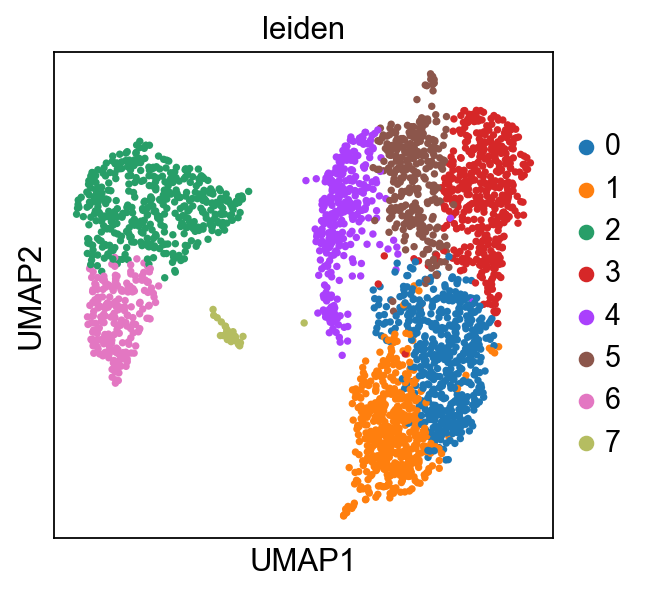

In [17]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color='leiden')

In [26]:
adata.layers["log_transformed"] = np.log1p(adata.X)

In [13]:
adata.obs['leiden']

AAACATACAACCAC-1    1
AAACATTGAGCTAC-1    1
AAACATTGATCAGC-1    1
AAACCGTGCTTCCG-1    6
AAACCGTGTATGCG-1    5
                   ..
TTTCGAACTCTCAT-1    2
TTTCTACTGAGGCA-1    1
TTTCTACTTCCTCG-1    4
TTTGCATGAGAGGC-1    5
TTTGCATGCCTCAC-1    0
Name: leiden, Length: 2700, dtype: category
Categories (8, object): ['0', '1', '2', '3', '4', '5', '6', '7']

In [27]:
adata.to_df(layer="log_transformed")

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.397895,0.693147,0.0,1.609438,0.0,0.000000,0.000000,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.526361,0.693147,0.0,2.197225,0.0,0.693147,0.000000,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.386294,1.098612,0.0,1.609438,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,1.386294,1.098612,0.0,1.098612,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,1.098612,0.0,0.693147,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.693147,0.000000,0.0,0.693147,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,1.098612,0.693147,0.0,1.609438,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.079442,0.000000,0.0,1.609438,0.0,0.000000,0.000000,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.693147,0.000000,0.000000,0.0,0.693147,0.0,0.000000,0.693147,0.0,0.0


In [10]:
adata.write("adata.h5ad")